<a href="https://colab.research.google.com/github/pritam195/Mumbai-Weather-Analytics/blob/main/Mumbai_Weather_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mumbai Weather Analytics 🌤️
This notebook explores historical weather patterns in Mumbai using data from 1990 to 2022. We analyze temperature and rainfall trends, detect anomalies, and draw seasonal insights using exploratory data analysis (EDA).

>Key Questions:

What are the hottest and coldest months in Mumbai?

How does rainfall vary across years and seasons?

Are there any noticeable outliers or weather anomalies?

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv("Mumbai Weather Data.csv")

In [3]:
df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0
...,...,...,...,...,...
11889,21-07-2022,27.6,25.6,30.5,10.9
11890,22-07-2022,28.3,26.0,30.5,3.0
11891,23-07-2022,28.2,25.8,31.3,5.1
11892,24-07-2022,28.1,25.6,30.4,7.1


#Exploratory Data Analysis (EDA)

Step 1: Data Cleaning and Data Preperation

Date Parsing and Indexing

*   Converted the time column to datetime format using the specified format "%d-%m-%Y" and stored it in a new column date.
*   Set the original time column as the DataFrame index for time-series operations.
* Dropped the original time column after setting it as the index (⚠️ Note: Do not rerun this cell as the time column is removed).



In [4]:
df['date'] = pd.to_datetime(df["time"],format = "%d-%m-%Y")
df.set_index(df["time"],inplace = True)
df.drop(columns="time",inplace = True)
df.head()

,tavg,tmin,tmax,prcp,date
time,,,,,
01-01-1990,23.2,17.0,NaN,0.0,1990-01-01
02-01-1990,22.2,16.5,29.9,0.0,1990-01-02
03-01-1990,21.8,16.3,30.7,0.0,1990-01-03
04-01-1990,25.4,17.9,31.8,0.0,1990-01-04
05-01-1990,26.5,19.3,33.7,0.0,1990-01-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   tavg    11883 non-null  float64       
 1   tmin    9440 non-null   float64       
 2   tmax    9987 non-null   float64       
 3   prcp    7213 non-null   float64       
 4   date    11894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 557.5+ KB


In [6]:
temp_col = ["tavg","tmin","tmax"]

**Handling Missing Values**

In [7]:
df[temp_col] = df[temp_col].fillna(method='ffill')
df['prcp'].fillna(0.0,inplace=True)
df.head()

,tavg,tmin,tmax,prcp,date
time,,,,,
01-01-1990,23.2,17.0,NaN,0.0,1990-01-01
02-01-1990,22.2,16.5,29.9,0.0,1990-01-02
03-01-1990,21.8,16.3,30.7,0.0,1990-01-03
04-01-1990,25.4,17.9,31.8,0.0,1990-01-04
05-01-1990,26.5,19.3,33.7,0.0,1990-01-05


In [8]:
df.isna().sum()

,0
tavg,0
tmin,0
tmax,1
prcp,0
date,0


In [9]:
df.sample()

,tavg,tmin,tmax,prcp,date
time,,,,,
20-11-2004,25.4,24.8,36.0,0.0,2004-11-20


>**Date Features Extraction**

Extracted year, month, and day from the datetime index of the DataFrame.
These features are useful for time-based grouping, analysis, and seasonal trend identification.

In [10]:
df["year"] = pd.DatetimeIndex(df.index).year
df["month"]= pd.DatetimeIndex(df.index).month
df["day"]=pd.DatetimeIndex(df.index).day
df.head()

,tavg,tmin,tmax,prcp,date,year,month,day
time,,,,,,,,
01-01-1990,23.2,17.0,NaN,0.0,1990-01-01,1990,1,1
02-01-1990,22.2,16.5,29.9,0.0,1990-01-02,1990,2,1
03-01-1990,21.8,16.3,30.7,0.0,1990-01-03,1990,3,1
04-01-1990,25.4,17.9,31.8,0.0,1990-01-04,1990,4,1
05-01-1990,26.5,19.3,33.7,0.0,1990-01-05,1990,5,1


In [11]:
df["year"].value_counts()

,count
year,
1992,366
2016,366
1996,366
2004,366
2000,366
2012,366
2020,366
2008,366
1990,365


>Dropping the data of the year 2022, as it is incomplete.

In [12]:
df = df[df['year'] != 2022]

#**Data Analysis**
Finding Hottest and Coldest Years

In [13]:
df.groupby("year")["tavg"].mean().sort_values(ascending=False).head()

,tavg
year,
2018,28.763836
2015,28.671507
2017,28.553973
2021,28.484384
2020,28.398087


>The year 2018 was the hottest year of Mumbai with average temperature of 28.76°C

In [14]:
df.groupby(["year","month"])["tavg"].mean().sort_values(ascending=False).head()

,,tavg
year,month,
2015,5,30.422581
2018,5,30.390323
1998,5,30.290323
2015,10,30.219355
2017,5,30.141935


>May 2015 was the hottest month of Mumbai with average temperature of 30.42°C

In [15]:
df.groupby(["year","month","day"])["tmax"].max().sort_values(ascending=False).head()

,,,tmax
year,month,day,
2011,3,16,41.3
2021,3,27,41.0
2018,3,25,41.0
1999,3,30,41.0
2011,3,17,41.0


>16th March 2011, was the hottest day of Mumbai with maximum temperature of 41.3°C

In [16]:
df.groupby("year")["tavg"].mean().sort_values().head()

,tavg
year,
1991,26.942466
1994,26.951233
2004,27.003005
1992,27.109836
1990,27.114521


>1991 was the coolest year of Mumbai with the average temperature of 26.94 °C

In [17]:
df.groupby(["year","month"])["tavg"].mean().sort_values().head()

,,tavg
year,month,
2004,1,23.454839
2003,12,24.167742
1991,12,24.306452
1995,1,24.516129
1994,12,24.554839


>January 2004, was the coolest month of Mumbai with average temperature of 23.45°C

In [18]:
df.groupby(["year","month","day"])["tmin"].min().sort_values().head()

year  month  day
2008  8      2      8.5
      9      2      8.6
2012  9      2      8.8
2008  6      2      9.4
      7      2      9.4
Name: tmin, dtype: float64

>2nd Aug 2008, was the coolest day of Mumbai with minimum record temperature of 8.5°C

In [19]:
df.groupby(["year"])["prcp"].mean().sort_values()

,prcp
year,
2002,3.483288
1999,4.697808
1995,4.735342
2015,4.837808
1997,5.079452
2001,5.201918
1992,5.228962
2012,5.630601
1996,5.778415


>The year 2002 had the lowest and 2019 had the highest rainfall in Mumbai

In [20]:
df.groupby(["year","month"])["prcp"].mean().sort_values(ascending=False).head()

,,prcp
year,month,
2015,6,34.623333
2021,7,31.974194
2020,7,31.732258
2011,7,30.980645
2010,8,30.412903


>June 2015, recorded the highest average rainfall in Mumbai.

In [21]:
df.groupby(["year","month","day"])["prcp"].mean().sort_values(ascending=False).head()

,,,prcp
year,month,day,
2005,7,26,461.0
1991,10,6,399.0
2019,2,7,374.9
2000,7,13,351.0
1991,9,6,351.0


>26th July 2005, recorded the highest rainfall in Mumbai.

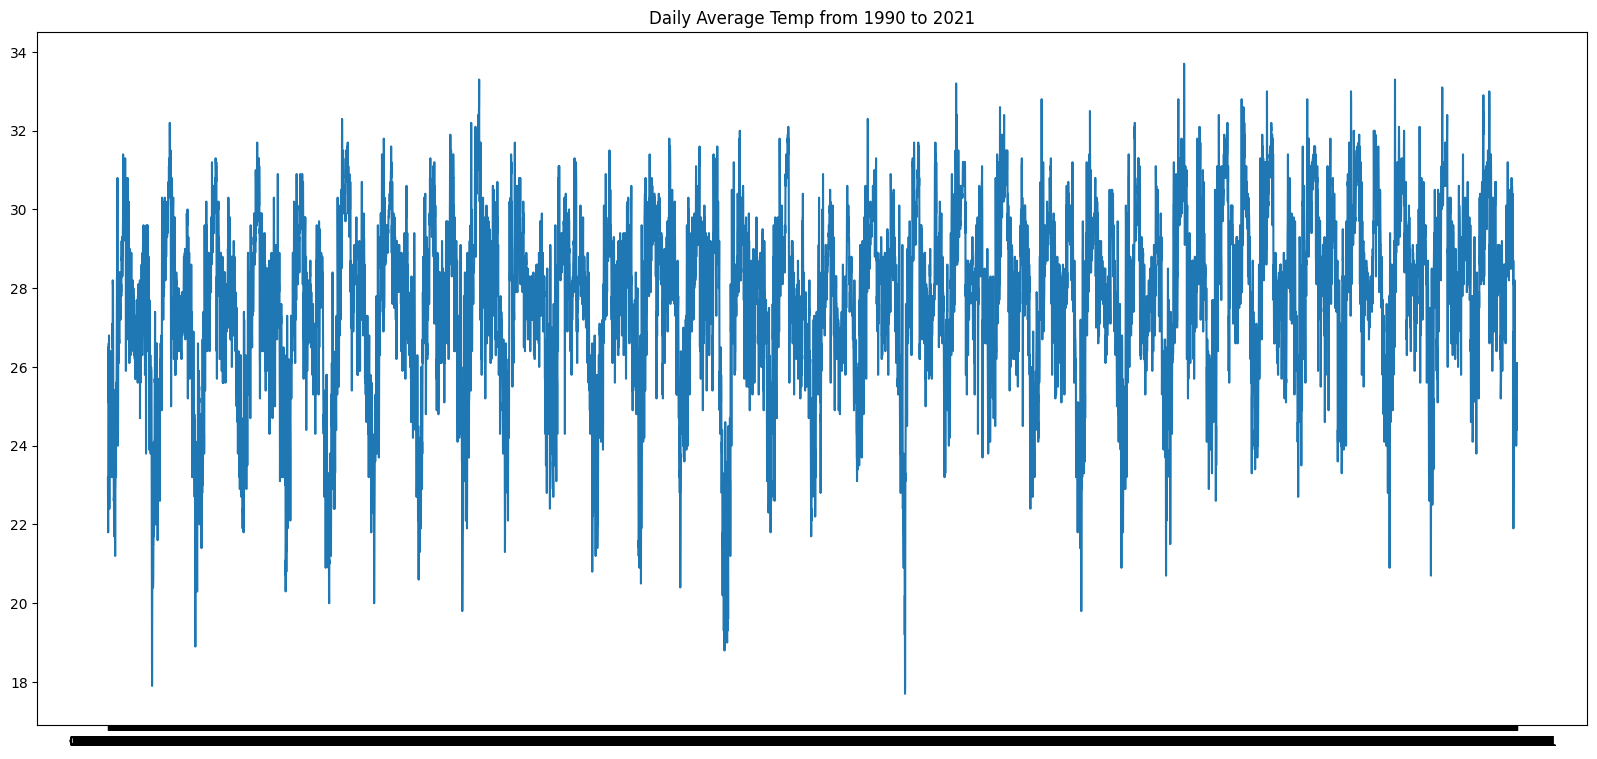

In [22]:
plt.figure(figsize=(20,9))
plt.plot(df["tavg"])
plt.title("Daily Average Temp from 1990 to 2021")
plt.show()

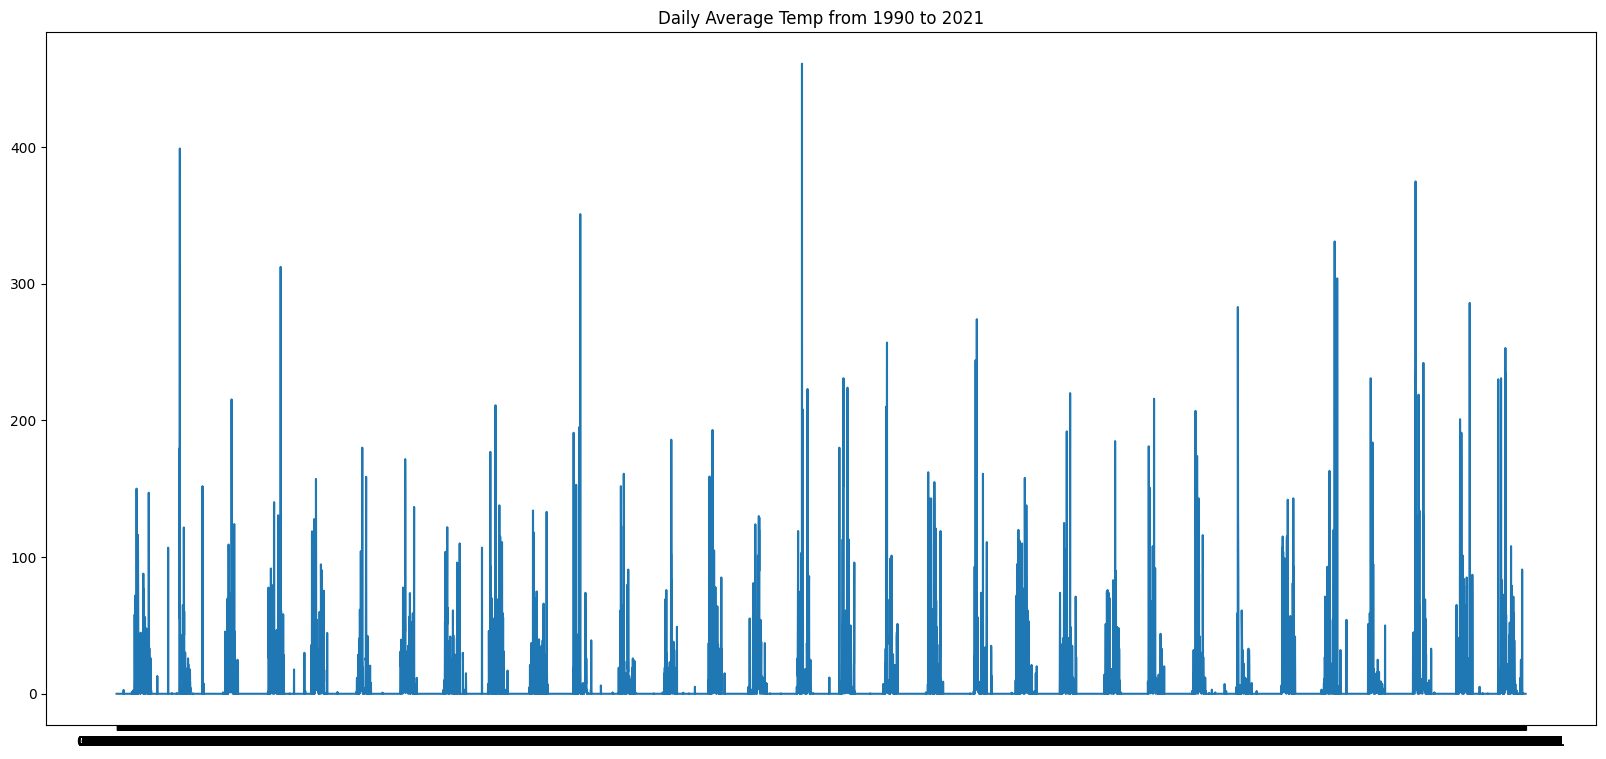

In [23]:
plt.figure(figsize=(20,9))
plt.plot(df["prcp"])
plt.title("Daily Average Temp from 1990 to 2021")
plt.show()

**Observation**

Data looks compressed so I will make a new dataframe with mean values yearwise.

In [24]:
yearwise = df.groupby("year")[["tavg","prcp"]].mean()
yearwise.head()

,tavg,prcp
year,,
1990,27.114521,7.116164
1991,26.942466,6.001370
1992,27.109836,5.228962
1993,27.164932,6.569589
1994,26.951233,6.726301


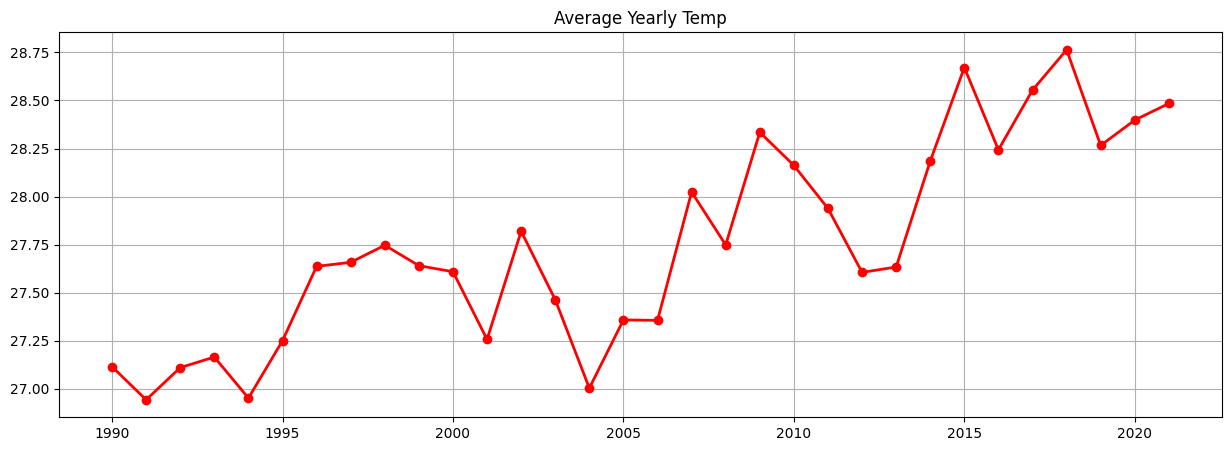

In [25]:
plt.figure(figsize=(15,5))
plt.plot(yearwise.index,yearwise["tavg"],marker="o",color="red",linewidth=2)
plt.title("Average Yearly Temp")
plt.grid()
plt.show()

**Observations**

The average temperature in mumbai is is increasing by a small margin since 1990.

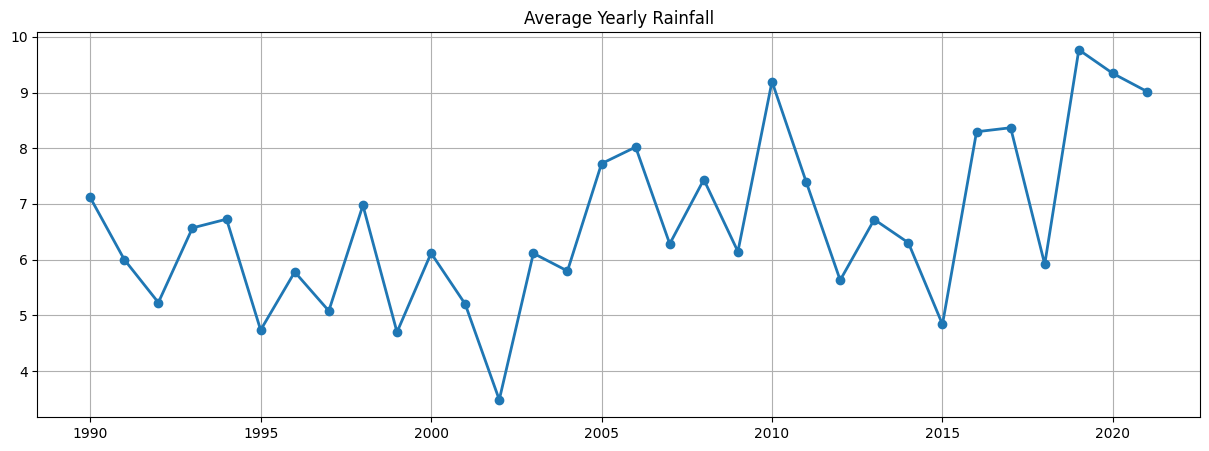

In [26]:
plt.figure(figsize=(15,5))
plt.plot(yearwise.index,yearwise["prcp"],marker="o",linewidth=2)
plt.title("Average Yearly Rainfall")
plt.grid()
plt.show()

**Observations**

Rainfall is showing very uncertain trend throughout the years.

In [27]:
months = df.groupby("month")[["tavg","prcp"]].mean()
months.head()

,tavg,prcp
month,,
1,25.785585,2.778528
2,26.795907,2.940044
3,28.016734,2.768548
4,28.690104,3.498021
5,29.367540,3.952722


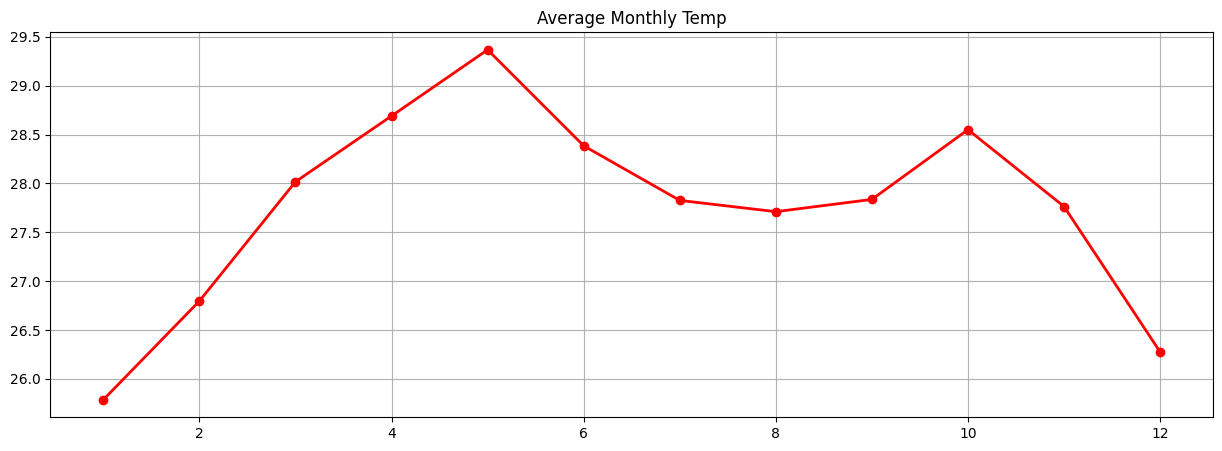

In [28]:
plt.figure(figsize=(15,5))
plt.plot(months.index,months["tavg"],marker="o",color="red",linewidth=2)
plt.title("Average Monthly Temp")
plt.grid()
plt.show()

**Observations**

* The temperature in mumbai starts rising from the month of march and it increases till the month of May.
* We can also see a sudden spike of temperature in the month of October. So, we can verify that the term October Heat actually exists

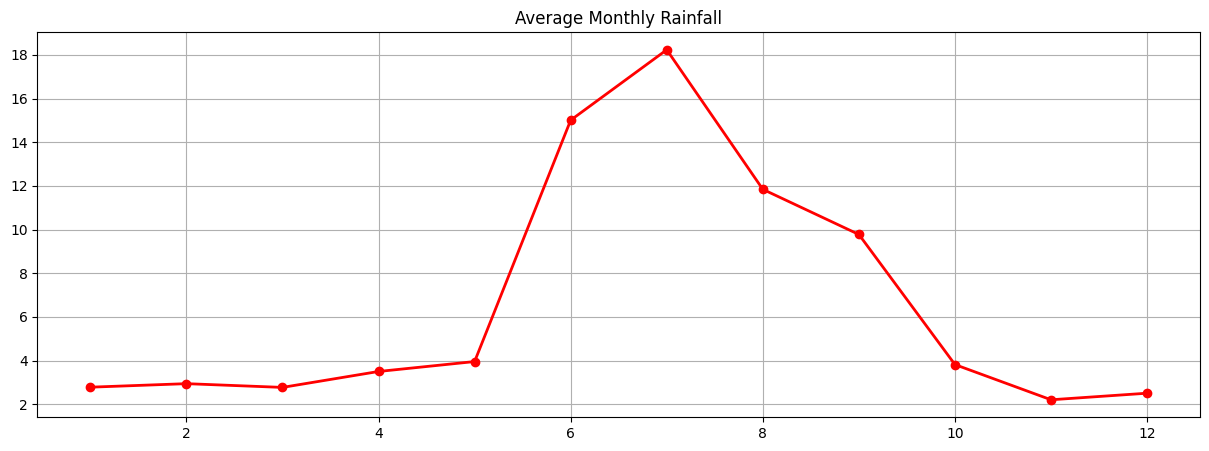

In [29]:
plt.figure(figsize=(15,5))
plt.plot(months.index,months["prcp"],marker="o",color="red",linewidth=2)
plt.title("Average Monthly Rainfall")
plt.grid()
plt.show()

**Observations**

In Mumbai, Monsoon starts from June and rises till July and lasts till September.

In [30]:
year_month_df = df.groupby(['year','month'], as_index=False)[['tavg','prcp']].mean()
year_month_df.head()

,year,month,tavg,prcp
0,1990,1,25.622581,1.419355
1,1990,2,25.196429,0.317857
2,1990,3,26.838710,0.661290
3,1990,4,27.550000,0.720000
4,1990,5,28.838710,7.229032


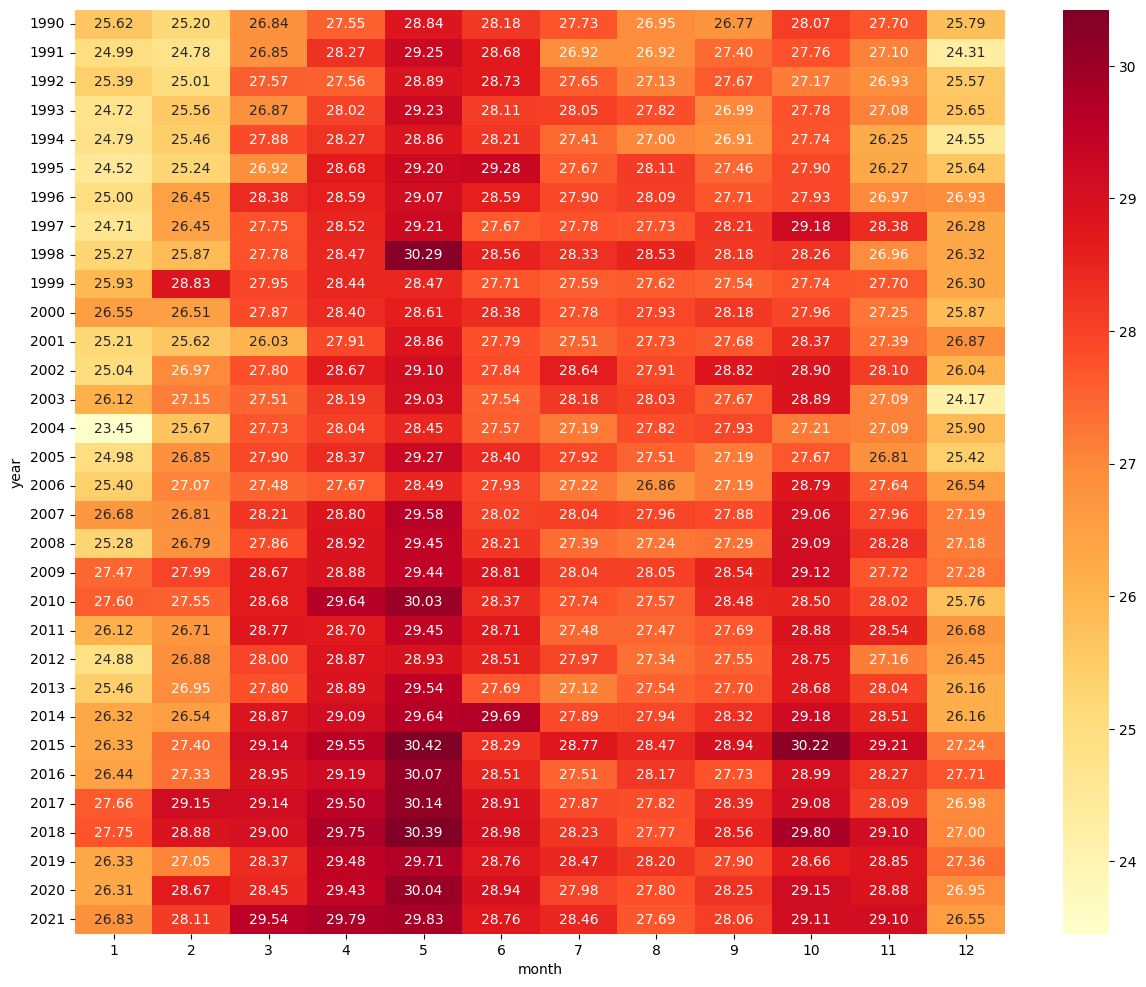

In [31]:
import seaborn as sns
data = year_month_df.pivot(index="year",columns="month",values="tavg")
plt.figure(figsize=(15,12))
sns.heatmap(data,annot=True,cmap='YlOrRd',fmt=".2f")
plt.show()

**🌡️ Temperature Observations – Mumbai (1990–2021)**

* The months of January, February, and December consistently experience the lowest temperatures across the year, reflecting Mumbai's mild winter season.

* The hottest months observed throughout the dataset are March, April, May, June, and October, indicating prolonged pre- and post-monsoon heat typical of Mumbai's climate.

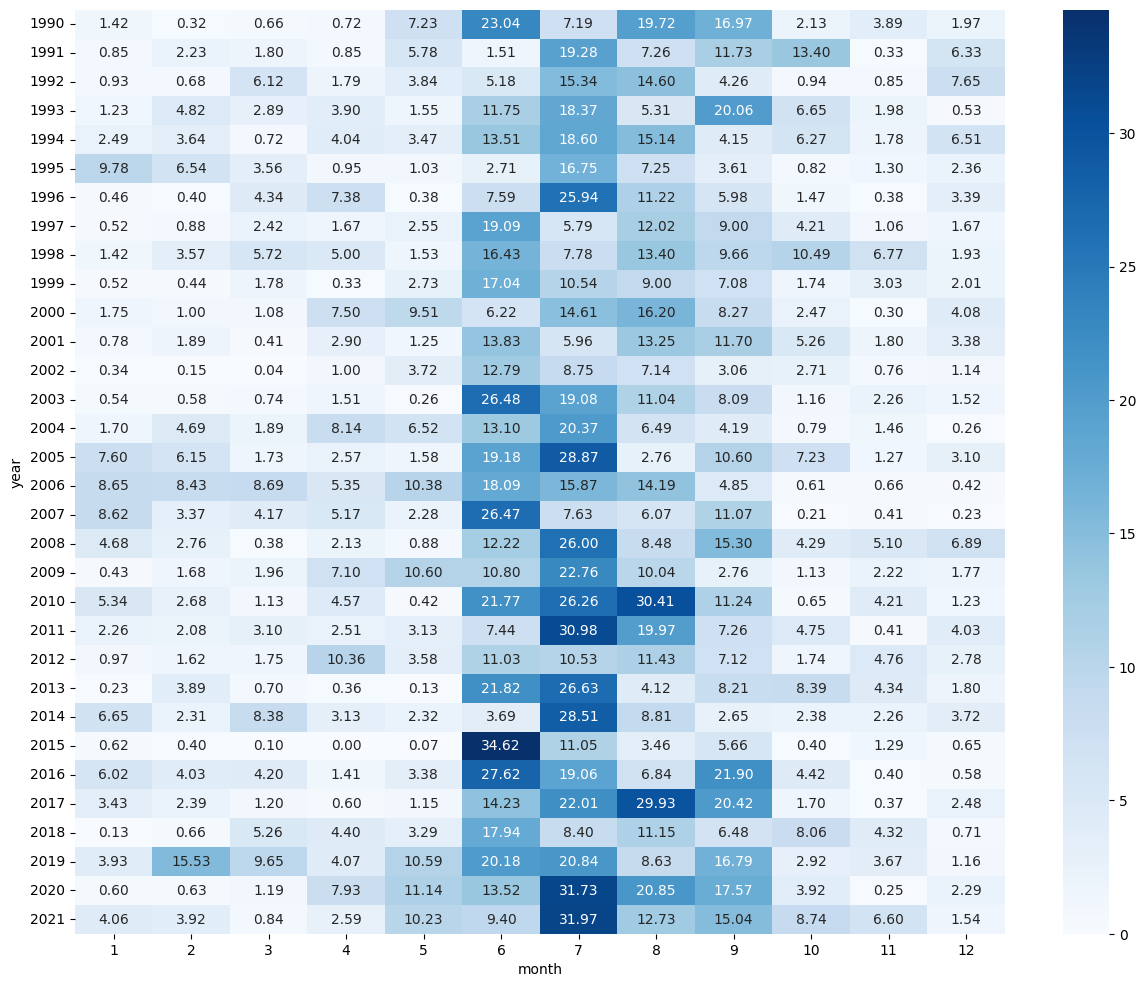

In [32]:
data = year_month_df.pivot(index="year",columns="month",values="prcp")
plt.figure(figsize=(15,12))
sns.heatmap(data,annot=True,cmap='Blues',fmt=".2f")
plt.show()

**🌧️ Rainfall Observations – Mumbai (1990–2021)**

* July consistently receives the highest precipitation, making it the peak monsoon month in Mumbai.
* During the years 2014, 2019 and 2020, the city witnessed unusually high average rainfall, significantly above historical trends.
* In 2021, there were noticeable spikes in rainfall during May, November, and December, indicating abnormal weather patterns outside the usual monsoon window.